# EDA Boston House Price

----

### Table of Contents

1. [Introduction to the Dataset & Features](#introduction)
2. [Loading the Dataset](#load)
3. [Understand the Dataset](#understand)
4. [Understand the Datatypes](#dtypes)
5. [Visualizing the DV and IVs](#vis1)
6. [Calculate SST](#sst)
7. [SST vs SSR vs SSE](#SSTSSRSSE)
8. [Univariate Linear Regression](#best_feat)
9. [Summary of Univariate LinReg](#summ1)
10.[Multiple Linear Regression](#mlreg)

### Introduction & Features <a name="introduction"></a>

A project for learning few optimal solutions to predict housing prices using Boston Housing Prices, uses supervised learning with multilinear regression (not to be confused with multivariate regression). The provided data by the SKLearn (Boston House) is rather clean and fit for purpose of learning. In practices, there might be a big chance that the data is less useful and preprocessing is rather needed. This project shall not focus on preprocessing such as, interpolate missing values, etc.

There are 13 features are gonna be used according to the database which you can find further details from [here](https://www.kaggle.com/c/boston-housing) and how to load it with SKLearn from [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston).

(As quoted from the DESCR attributes of the dataset) All attribute Information in order are:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per USD 10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    Lower status of the population
* MEDV     Median value of owner-occupied homes in USD 1000's

In the project, each I.V. features versus D.V. correlations will be evaluated to see how relevant they are to build the best predictor. 

### Loading the Dataset <a name="load"></a>

The dataset is available through [Kaggle](www.kaggle.com) but since we're gonna use [SKLearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) anyway, so I picked the latter.

In [230]:
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *

# scikit-learn
from sklearn.datasets import load_boston

# matplotlib inline
%matplotlib inline

### Understand the Dataset <a name="understand"></a>

Make sure you understand what informations are provided by the dataset. Read through all the definitions of the features and the target (outcome). Since I will use Pandas as dataframe for most of the data, we need to build the dataframe as the first step. Make sure to visualize it in a good way in such you get the big picture of how the data looks like.

In [231]:
# load
boston = load_boston()

# build the dataframe for all I.Vs (boston['data']) or boston.data
df_boston_data = pd.DataFrame(boston['data'], columns=boston['feature_names'])

# concatenate the D.V (boston['target']) and name id 'HOPRICE'
df_boston_data['HOPRICE'] = pd.Series(boston['target'])
df_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOPRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we see **HOPRICE** is part of the dataset and we're good to go. Remember, in the real-world data, we mostly will encounter significantly more random data and you would likely need a lot of preprocessing before you see the same structure as shown above.

### Understand the Datatypes <a name="dtypes"></a>

Pandas is capable of easily giving us informations on each features datatype. DataFrame will infer automatically the datatypes and what we're gonna do is to see their types. What we want from this step is to differentiate their types according to the proper statistic types as explained in [here](https://en.wikipedia.org/wiki/Statistical_data_type). As we see below, everything are neither Categorical or Binary, but instead, all are continuous values and as expected the **HOPRICE** itself is not a Categorical thus we're not gonna do any Logistic Regression to create our best fit as Linear Regression (hopefully) will sufficient.

In [232]:
df_boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
HOPRICE    float64
dtype: object


### Start Visualizing D.V without any inputting I.Vs. <a name="vis1"></a>

We ought to visualize the relation between I.Vs (all features) to the D.V to see how significant their impacts to the D.V. That can be done by manually visualizing them and see a pattern that can be fit by our model, which in this case Linear Regression best fit model. However, let's visualize the **HOPRICE** alone and see how we will see the best fit naturally using **Mean** of the data.

To give a better understanding, an equation for linear line is given by:

$$ f(x) = mx + b + e$$

Given the linear equation, *m* is the slope or gradient, or later will be addressed as *coefficient* and *b* is the y-interceptor and residual error as *e*. If there's no valid *x* variables and no residual error, then best fit line would be:

$$ f(0) = b $$

This is saying that the most basic way to estimate house price without an independent variable is to start with the *b* which in most cases interpreted as the *mean* values. Here let's calculate the mean value of **HOPRICE** and plot. 

In [233]:
# calculate mean
m_hoprice = df_boston_data['HOPRICE'].mean()
m_hoprice

22.532806324110698


Since we're gonna do a lot of visualizations, picking best plotting API is important. Here, best option is to use [Seaborn](https://seaborn.pydata.org/) for correlation plot and but for interactive plot, one of the alternative is [Plotly](https://plot.ly/python/). I will try to use both and later, will use Seaborn more often than others since it is specifically purposed for statistical data visualization.



In [234]:
"""PLOTLY.js"""

# scatter plots for housing prices
trace_hoprice = Scatter(
    x=df_boston_data.index,
    y=df_boston_data['HOPRICE'],
    name='HousingPrice',
    mode='markers')

# line for b-val/mean
trace_mhoprice = Scatter(
    x=[0, df_boston_data.shape[0]],
    y=[m_hoprice, m_hoprice],
    name='Mean Values %.2f' % m_hoprice,
    mode='lines',
    line=dict(
        width=3))

# create the data
data = [trace_hoprice, trace_mhoprice]

# layouting and plot
layout = Layout(
    title='Housing Prices vs Mean Values as Best Fit',
    xaxis=dict(title='house index'),
    yaxis=dict(title='house price $1000'),
    showlegend=True)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='housing-price-scatter')

### Calculate SST (Total of Squared Error) using Mean Best Fit <a name="SST"></a>

To evaluate the values of the current best fit here, we need to calculate how each elements of the dataset variates from our current best fit line using **Mean** best fit. To do this, we just need to find the $\sum (y_i - \overline y)^2$ and sum all of them with $\overline y$ is the **mean** or *b*. 

Code wise, to do this, let's create another dataframe which comprised of *y*, residual $(y_i - \overline y)$, and squared of the residual $(y_i - \overline y)^2$.

In [235]:
# setup the first column - HOPRICE
df_calc_sst = pd.DataFrame(data=df_boston_data['HOPRICE'])
# df_calc_sse.loc['MEAN'] = df_calc_sse.mean()

# add the residual - RES
df_calc_sst['RES'] = df_calc_sst['HOPRICE'] - df_calc_sst['HOPRICE'].mean()

# add the squared residual -RES2
df_calc_sst['RES2'] = df_calc_sst['RES'] ** 2

# check
df_calc_sst.head()

,HOPRICE,RES,RES2
0,24.0,1.467194,2.152657
1,21.6,-0.932806,0.870128
2,34.7,12.167194,148.040602
3,33.4,10.867194,118.095898
4,36.2,13.667194,186.792183


In [236]:
val_sse = np.sum(df_calc_sst['RES2'])
val_sse

42716.29541501979

### SST vs SSR vs SSE <a name="SSTSSRSSE"></a>

Now it is known that the sum of squared residual is **42716.2954** which is now addressed as SST. Later, this SST will be used to be the basic value for the performance benchmarking of our linear best fit model following this simple law:

$$ SST =  SSR + SSE $$

which *SST* is the total of squared error from using mean fit, and *SSE* will be the new sum of squared error from using our linear regression model. *SSR* will be the value to look up to since it represents how **much our linear regression eliminates error from the dataset**. 

Now let's do one of the most interesting in preprocessing the dataset, finding the best features.

### Univariate Linear Regression <a name="best_feat"></a>

Finding the best features, by meaning, is to find the best correlated features which contributes to the dependent variable D.V which in this case **HOPRICE**. Obvious selection, would be to guess the best feature and for the sake of it, let's pick feature **RM** number of rooms in the house. Let's start by visualizing X-Y scattered plot with **RM** for the X-axis and **HOPRICE** for the Y-axis.

In [237]:
trace_rm = Scatter(
    x=df_boston_data['RM'],
    y=df_boston_data['HOPRICE'],
    name='room vs house price',
    mode='markers')

# layouting and plot
layout = Layout(
    title='Number of Rooms vs Housing Prices',
    xaxis=dict(title='number of rooms'),
    yaxis=dict(title='house price $1000'),
    showlegend=True)

fig = Figure(data=[trace_rm], layout=layout)
py.iplot(fig, filename='housing-price-vs-rooms-scatter')

Here as you can see there is a trend between growing number of rooms to the increaing price of the house. The trend here can be found by Linear Regression which gives us the best coefficient *m* and *intercept* which satisfy equation in [here](#vis1) for given independent feature. 

To do this, let's create an object of LinearRegression class from Scikit-Learn.


In [238]:
# create an object for Linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

Now, prepare the feature data **RM** and target **HOPRICE**, and split the training and test ratio by an arbitrary number of 0.8 which means 80% of all sample data will be for training to get best fit line and 20% for the test. One can say that pick the ratio either 80/20 or 70/30.

In [239]:
# split the training and test
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(df_boston_data['RM'].values, 
                                                                     df_boston_data['HOPRICE'].values,
                                                                     train_size=0.8)

print('We have training data with {} number or rows'.format(x_train.shape))
print('We have test data with {} number of rows'.format(x_test.shape))

We have training data with (404,) number or rows
We have test data with (102,) number of rows


Before we use the splitted training and test data, the *fit* method only accepts 2D array input, thus we need to reshape above set to (*N_samples*, 1) using *reshape*. Then, we can use the training set *x_train* and *y_train* as input to the fitting method from the *lreg* object.

In [240]:
# reshape
x_train = np.reshape(x_train, (len(x_train), 1))
y_train = np.reshape(y_train, (len(y_train), 1))
x_test = np.reshape(x_test, (len(x_test), 1))
y_test = np.reshape(y_test, (len(y_test), 1))

# fit
lreg.fit(x_train, y_train)

print('coefficients: %.4f' % lreg.coef_)
print('y-intercept: %.4f' % lreg.intercept_)

coefficients: 8.9067
y-intercept: -33.4557


Now with known coefficient *m* and y-intercept *b*, the equation shall be:

$$ \hat y = mx + b \\
\hat y = 8.7567x - 32.6496 
$$

The best fit now can be visualize using Seaborn *regplot* function.

Text(0.5,1,'RM vs HOPRICE with f(x)=8.9067x + (-33.4557) best fit')

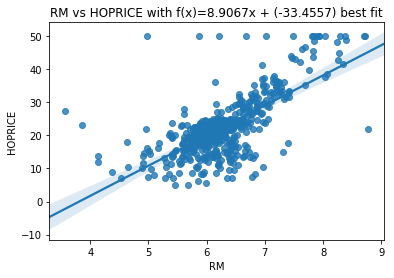

In [241]:
ax = sns.regplot(x='RM', y='HOPRICE', data=df_boston_data)
ax.set_title('RM vs HOPRICE with f(x)=%.4fx + (%.4f) best fit' % (lreg.coef_, lreg.intercept_))

### Evaluate the SSE of the Best Fit (Training vs Test)

Now that we have the model, we have to predict using both training and test sets. To evaluate the accuracy of the model, we refer back to the SSE of both. Let's predict using both sets:

In [242]:
# predict train
pred_train = lreg.predict(x_train)

# create dataframe to show
df_result = pd.DataFrame(data=np.hstack((x_train, y_train, pred_train)), columns=['XTRAIN', 'YTRAIN', 'PREDTRAIN'])

# find error (RES) and RES**2
df_result['RES'] = df_result['PREDTRAIN'] - df_result['YTRAIN'].mean()

# add the squared residual -RES2
df_result['RES2'] = df_result['RES'] ** 2

df_result.head()

,XTRAIN,YTRAIN,PREDTRAIN,RES,RES2
0,5.854,10.8,18.683931,-3.731168,13.921611
1,6.860,29.9,27.644042,5.228943,27.341848
2,6.140,20.8,21.231239,-1.183860,1.401524
3,8.337,41.7,40.799195,18.384096,337.974990
4,6.072,14.5,20.625586,-1.789513,3.202358


In [243]:
# predict test
pred_test = lreg.predict(x_test)

# create dataframe to show
df_result_test = pd.DataFrame(data=np.hstack((x_test, y_test, pred_test)), columns=['XTEST', 'YTEST', 'PREDTEST'])

# find error (RES) and RES**2
df_result_test['RES'] = df_result_test['PREDTEST'] - df_result_test['YTEST'].mean()

# add the squared residual -RES2
df_result_test['RES2'] = df_result_test['RES'] ** 2

df_result_test.head()

,XTEST,YTEST,PREDTEST,RES,RES2
0,5.747,8.5,17.730918,-5.268102,27.752898
1,7.241,32.7,31.037484,8.038464,64.616908
2,5.807,22.4,18.265318,-4.733702,22.407932
3,7.016,50.0,29.033483,6.034463,36.414748
4,5.895,18.5,19.049105,-3.949915,15.601826


Now calculate the SSE from the both training and test data:

In [244]:
pred_train_sse = np.sum(df_result['RES2'])
pred_test_sse = np.sum(df_result_test['RES2'])

print('Sum of Squared Error (SSE) for training dataset is %.4f' % pred_train_sse)
print('Sum of Squared Error (SSE) for test dataset is %.4f' % pred_test_sse)

Sum of Squared Error (SSE) for training dataset is 16150.7868
Sum of Squared Error (SSE) for test dataset is 3604.8033


We see much more improved here with the current model compared to **SST** of 42716.2954 shown [here](#SSTSSRSSE).

### Summary of the Univariate Regression Model <a name="summ1"></a>

Now since we have SSE of our linear regression model from both training and test dataset, now we want to summarize of how the **SSR** shall be. Using, training dataset, the **SSR** shall be $SST-SSE$:

In [245]:
SSR_training = val_sse - pred_train_sse
SSR_test = val_sse - pred_test_sse

SSR_training_percent = SSR_training/val_sse * 100.0
SSR_test_percent = SSR_test/val_sse * 100.0

print('---------------------------------------------Recap---------------------------------------------')
print('The total of squared errors (SST) is: %.4f' % val_sse)
print('The SSR for training data (SSR_Train) is: %.4f' % SSR_training)
print('Given training data, the model is capable to remove %.4f percent of error from SST' % SSR_training_percent)
print('The SSR for test data (SSR_Train) is: %.4f' % SSR_test)
print('Given test data, the model is capable to remove %.4f percent of error from SST' % SSR_test_percent)

---------------------------------------------Recap---------------------------------------------
The total of squared errors (SST) is: 42716.2954
The SSR for training data (SSR_Train) is: 26565.5086
Given training data, the model is capable to remove 62.1906 percent of error from SST
The SSR for test data (SSR_Train) is: 39111.4921
Given test data, the model is capable to remove 91.5611 percent of error from SST



Well well well, it seems like we have managed to reduce the squared residual errors by almost 90% on the test data just by using number of rooms as a single independent variable. What if we add more? Enter *Multiple Linear Regression*.

### Multiple Linear Regression <a name="mlreg"></a>